## Exercise 1 (13 points)

Load the matrix $ L = [l_{ij}] $ contained in the file `matrix_L.txt`. This matrix is the Euclidean distance matrix of a set of 50 points $ p_i $ where $ i = 1, \ldots, 50 $. Let us call $ P $ the unknown $ 50 \times 3 $ matrix containing the coordinates of the 50 points (the $ i $-th row is the $ i $-th point).

1. **(1 point)** Check that the origin of the coordinate system is placed in the centroid of the set of points.
2. **(2 points)** Use the following relation to compute the elements of $ P^T P $:

$$
	p_i^T p_j = -\frac{1}{2} \left( l_{ij}^2 - \frac{1}{N} \sum_{j=1}^N l_{ij}^2 - \frac{1}{N} \sum_{i=1}^N l_{ij}^2 + \frac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N l_{ij}^2 \right)
$$

3. **(4 points)** Describe if and how the eigenvalue decomposition can be used to compute $ P $ starting from the matrix $ P^T P $.
4. **(3 points)** Compute $ P $ using the method described in the previous point.
5. **(3 points)** Prove relation (1). (Hint: start by noticing that $ l_{ij}^2 = (p_i - p_j)^T (p_i - p_j) $ and then sum only over $ i $, only over $ j $, and over both $ i $ and $ j $).



---

### Notes:
I didn't fully understand the exercise, here are some things that I believe to be wrong:
1. If $P$ is a $50 \times 3$ matrix, then $P^T P$ is a $3 \times 3$ matrix, not a $50 \times 50$ matrix. Making most of the exercise wrong. So I will assume that $P$ is a $3 \times 50$ matrix.
   
2. Point 1 is not clear, what does it mean to check that the origin of the coordinate system is placed in the centroid of the set of points? The distance matrix $L$ is given, but the points $p_i$ are not given, and rototranslations of the points would not change the distance matrix. This implies that the true centroid of the real set of points is impossible to know.

In the following I will prove these points, then I will solve the exercise as best as I can.

In [5]:
import numpy as np
import scipy as sp

# 1) if P is (50, 3) than P.T@P is (3, 3) and not (50, 50)

P = np.random.rand(50, 3)
print((P.T@P).shape)

# 2) whenever P the distance matrix is invariant to rotation and translation
#    so we can always center the points to the origin and then rotate them
#	 or on the contrary move them away from the origin and then rotate them

P = np.random.rand(50, 3)
D1 = sp.spatial.distance_matrix(P, P)

# rotation and translation
R = sp.linalg.orth(np.random.rand(3, 3))
t = np.random.rand(3)
P = P @ R + t
D2 = sp.spatial.distance_matrix(P, P)


print('Are the distance matrix equals?', np.allclose(D1, D2))


(3, 3)
Are the distance matrix equals? True


### Start of solution

---


Matrix L has shape: (50, 50)
Matrix L has 2500 elements
Matrix L has 2450 non-zero elements
Matrix L has 50 zero elements


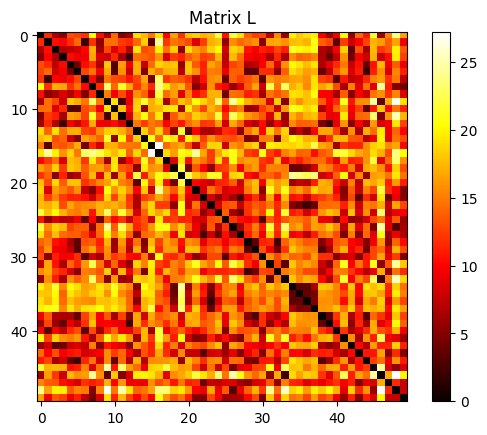

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# load the matrix
L = np.loadtxt('matrix_L.txt')

# plot information about the matrix
print('Matrix L has shape:', L.shape)
print('Matrix L has', L.size, 'elements')
print('Matrix L has', np.count_nonzero(L), 'non-zero elements')
print('Matrix L has', L.shape[0] * L.shape[1] - np.count_nonzero(L), 'zero elements')

# plot the matrix as an heatmap
plt.figure()
plt.imshow(L, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Matrix L')
plt.show()


1. **(1 point)** Check that the origin of the coordinate system is placed in the centroid of the set of points.

In [14]:
# Run after point 4
# centroid = np.mean(P, axis=1)

# print('The centroid of the reconstructed points is:', centroid)
# assert np.allclose(centroid, np.zeros(3))
# print('The centroid is at the origin')

The centroid of the reconstructed points is: [ 2.84217094e-16 -1.77635684e-17 -1.06581410e-16]
The centroid is at the origin


2. **(2 points)** Use the following relation to compute the elements of $ P^T P $:

$$
	p_i^T p_j = -\frac{1}{2} \left( l_{ij}^2 - \frac{1}{N} \sum_{j=1}^N l_{ij}^2 - \frac{1}{N} \sum_{i=1}^N l_{ij}^2 + \frac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N l_{ij}^2 \right)
$$

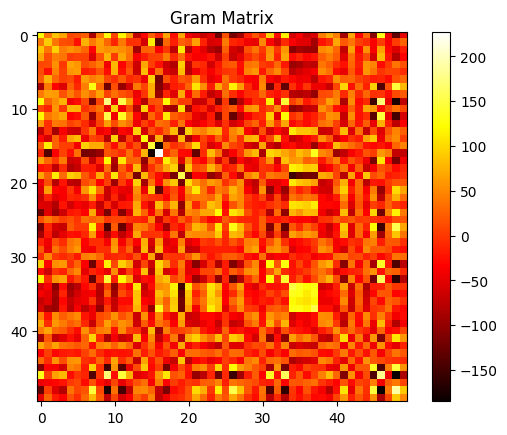

In [8]:
GramMatrix = np.zeros_like(L)

for i in range(L.shape[0]):
	for j in range(L.shape[1]):
		GramMatrix[i,j] = -0.5 * (
				L[i,j]**2 
				- 1/50 * np.sum(L[i,:]**2)
				- 1/50 * np.sum(L[j,:]**2)
				+ 1/50**2 * np.sum(L**2)
			)

# plot the matrix as an heatmap
plt.figure()
plt.imshow(GramMatrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Gram Matrix')
plt.show()

3. **(4 points)** Describe if and how the eigenvalue decomposition can be used to compute $ P $ starting from the matrix $ P^T P $.

Yes, it is possible at least partially. The eigenvalue decomposition can be used to compute a possible $P$ from the $P^T P$ matrix, this can be achieved using SVD decomposition. The solution however is not unique given that any orthogonal projection $P \cdot U$ would result in an equally accettable solution

1. **Eigenvalue Decomposition of $ P^T P $**:  
   Since $ P^T P $ is a symmetric positive semi-definite matrix (square of a matrix), it can be decomposed using eigenvalue decomposition. Specifically, we can write:
   $
   P^T P = V \Lambda V^T
   $
   where:
   - $ V $ is an orthogonal matrix whose columns are the eigenvectors of $ P^T P $.
   - $ \Lambda $ is a diagonal matrix containing the eigenvalues of $ P^T P $, denoted by $ \lambda_1, \lambda_2, \dots, \lambda_n $.
   - This decomposition can be achieved through SVD

2. **Square Root of $ \Lambda $**:  
   The diagonal matrix $ \Lambda $ contains the eigenvalues of $ P^T P $. Since $ P^T P $ is positive semi-definite, all eigenvalues $ \lambda_i $ are non-negative. We can take the square root of $ \Lambda $ to get a new diagonal matrix $ \Lambda^{1/2} $, where the diagonal elements are $ \sqrt{\lambda_1}, \sqrt{\lambda_2}, \dots, \sqrt{\lambda_n} $.

3. **Constructing $ P $**:  
   The original matrix $ P $ can be reconstructed using:
   $
   P = V \Lambda^{1/2} U^T
   $
   Here, $ U $ is an arbitrary orthogonal matrix. This is because the product $ P^T P $ gives back the original matrix when $ P $ is of the form $ V \Lambda^{1/2} U^T $, as:
   $
   P^T P = (U \Lambda^{1/2} V^T) (V \Lambda^{1/2} U^T) = U \Lambda^{1/2} \Lambda^{1/2} U^T = V \Lambda V^T
   $
   where $ U $ cancels out.

   The matrix $ U $ represents the freedom in the choice of the basis for $ P $. If $ P $ is required to be orthogonal, then $ P $ is determined up to a sign; otherwise, any orthogonal matrix $ U $ will result in a valid $ P $.


4. **(3 points)** Compute $ P $ using the method described in the previous point.


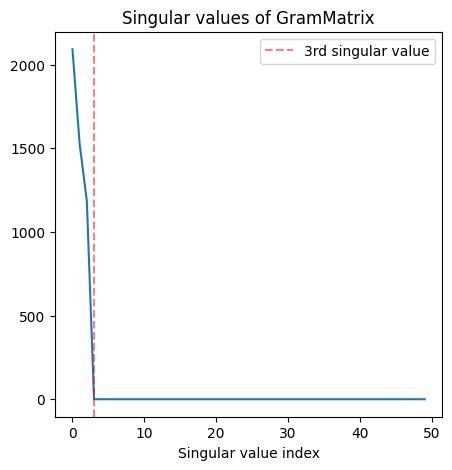

As we can see the singular values of the GramMatrix are zeroed after the 3rd one, proving that the matrix P had only 3 linearly independent columns.
The three non linearly independent columns correspond to the 3 dimensions of the points.
(3, 50)


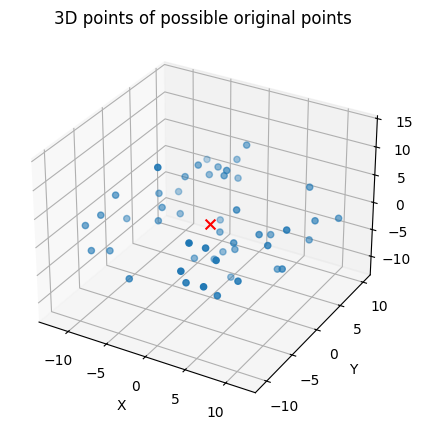

Are the distance matrix equal to the original? True


In [9]:
V, S, VT = np.linalg.svd(GramMatrix)

plt.figure(figsize=(5, 5))
plt.plot(S)
plt.axvline(3, color='red', linestyle='--', label='3rd singular value', alpha=0.5)
plt.legend()
plt.xlabel('Singular value index')
plt.title('Singular values of GramMatrix')
plt.show()

print("As we can see the singular values of the GramMatrix are zeroed after the 3rd one, proving that the matrix P had only 3 linearly independent columns.")
print("The three non linearly independent columns correspond to the 3 dimensions of the points.")

# knowing that the P had just 3 colums we can compute it using the first 3 singular vectors
pseudo_diagonal = np.zeros((50, 3))
pseudo_diagonal[0,0] = np.sqrt(S[0])
pseudo_diagonal[1,1] = np.sqrt(S[1])
pseudo_diagonal[2,2] = np.sqrt(S[2])
PT = V[:,:3] @ np.diag(np.sqrt(S[:3]))

P = PT.T
print(P.shape)

# plot the points in 3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P[0,:], P[1,:], P[2,:])
ax.scatter(0, 0, 0, marker='x', color='red', s=50, label='origin')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D points of possible original points')
plt.show()

# ensure that the distance matrix is the same as the original one
D1 = sp.spatial.distance_matrix(P.T, P.T)
print('Are the distance matrix equal to the original?', np.allclose(D1, L))


5. **(3 points)** Prove relation (1). (Hint: start by noticing that $ l_{ij}^2 = (p_i - p_j)^T (p_i - p_j) $ and then sum only over $ i $, only over $ j $, and over both $ i $ and $ j $).


Let's walk through the proof of the given relation step by step.

### Step 1: Start with the Euclidean Distance

The Euclidean distance between two points $ p_i $ and $ p_j $ in 3D space is given by:

$
l_{ij}^2 = (p_i - p_j)^T (p_i - p_j)
$

Expanding the right-hand side:

$
l_{ij}^2 = p_i^T p_i - 2 p_i^T p_j + p_j^T p_j
$

This equation can be rearranged to express the dot product $ p_i^T p_j $:

$
p_i^T p_j = \frac{1}{2} \left( p_i^T p_i + p_j^T p_j - l_{ij}^2 \right)
$

### Step 2: Express the Sum Terms

Now, consider the sums over $ i $ and $ j $:

1. **Sum over $ i $:**

$
\sum_{i=1}^{N} l_{ij}^2 = \sum_{i=1}^{N} (p_i^T p_i - 2 p_i^T p_j + p_j^T p_j) = \sum_{i=1}^{N} p_i^T p_i - 2 \sum_{i=1}^{N} p_i^T p_j + N p_j^T p_j
$

This simplifies to:

$
\frac{1}{N} \sum_{i=1}^{N} l_{ij}^2 = \frac{1}{N} \sum_{i=1}^{N} p_i^T p_i - 2 p_j^T \left(\frac{1}{N} \sum_{i=1}^{N} p_i\right) + p_j^T p_j
$

Since the centroid is at the origin, $ \frac{1}{N} \sum_{i=1}^{N} p_i = 0 $, thus simplifying further to:

$
\frac{1}{N} \sum_{i=1}^{N} l_{ij}^2 = \frac{1}{N} \sum_{i=1}^{N} p_i^T p_i + p_j^T p_j
$

2. **Sum over $ j $:**

Similarly, summing over $ j $:

$
\frac{1}{N} \sum_{j=1}^{N} l_{ij}^2 = \frac{1}{N} \sum_{j=1}^{N} p_j^T p_j + p_i^T p_i
$

3. **Double Sum:**

For the double sum over both $ i $ and $ j $:

$
\frac{1}{N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} l_{ij}^2 = \frac{1}{N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} (p_i^T p_i + p_j^T p_j - 2 p_i^T p_j)
$

This simplifies to:

$
\frac{1}{N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} l_{ij}^2 = \frac{2}{N} \sum_{i=1}^{N} p_i^T p_i
$

### Step 3: Combine All Terms

Now, using the equation:

$
p_i^T p_j = \frac{1}{2} \left( p_i^T p_i + p_j^T p_j - l_{ij}^2 \right)
$

We substitute the sums:

$
p_i^T p_j = -\frac{1}{2} \left[ l_{ij}^2 - \frac{1}{N} \sum_{k=1}^N l_{ik}^2 - \frac{1}{N} \sum_{k=1}^N l_{kj}^2 + \frac{1}{N^2} \sum_{k=1}^N \sum_{l=1}^N l_{kl}^2 \right]
$

This equation shows that the matrix $ P^T P $ (which contains the dot products $ p_i^T p_j $) can be computed directly from the Euclidean distance matrix $ L $ using the formula provided.

### Conclusion

Thus, we have derived the given relation from the Euclidean distance and shown that it is valid for computing the elements of $ P^T P $.


---

# Exercise 2 (14 points)

Consider the minimization of the 2D quadratic function:

$$
J(x) = \frac{1}{2} \left( x^2 + \epsilon y^2 \right),
$$

where $ x = (x, y) $ and $ \epsilon > 0 $.

1. **(1 point)** How does $ \epsilon $ impact the numerical solution of the problem?
2. **(1 point)** Let us consider the Gradient Descent (GD) algorithm with variable learning rate $ \tau_k > 0 $. Write the recursive relation that describes the method.
3. **(2 points)** In the convex case, if $ J $ is of class $ C^2 $, in order to have convergence, we must have:

$$
0 < \tau_k < \frac{2}{\sup_x \| HJ(x) \|},
$$

where $ HJ(x) $ is the Hessian of $ J $. Compute the maximum value of $ \tau_k $ to have convergence.

4. **(2 points)** Implement the GD method with constant step size. Assume $ \eta = 4 $ and $ x_0 = (0.9, 0.3) $. Display the iterations on the contour figure for different values of the step size. Comment on the results.
5. **(2 points)** Consider the exact line search method for the dynamic choice of the step size. In this method, at each time step we choose:

$$
\tau_k = \arg \min_s J(x^{(k)} - s \nabla J(x^{(k)})).
$$

Compute the explicit expression of $ \tau_k $ given by the exact line search method for the function above.

6. **(3 points)** Implement the GD method with variable step size using the expression derived in the previous point and apply the method to the minimization of the function above. Display the iterations on the contour graphs. Comment on the results.
   
7. **(3 points)** Prove the expression for $ \tau_k $ given above.


### Start of solution

1. **(1 point)** How does $ \epsilon $ impact the numerical solution of the problem?

#### Answer:

The parameter $ \epsilon $ does not impact the numerical solution of the problem. The function $ J(x) $ is the sum of two squared terms so it is minimized when both terms are zero. Given this happens whenever $ x = (0, 0) $, the value of $ \epsilon $ does not change the minimum of the function. However:
 - There is actually an exception, that is when $ \epsilon = 0 $, the function becomes $ J(x) = \frac{1}{2} x^2 $, which is a simple parabola with minimum at $ x = (0, y) $ whichever value has y. Still also in this particular case $ x = (0, 0) $ is a minimum.
 - The value of $ \epsilon $ does change the shape of the function, making it more elongated in the $ y $ direction as $ \epsilon $ increases. This impacts the convergence properties of optimization algorithms as gradiet descent. We can see that epsilon is in fact present in the hessian of J.

In [10]:
import sympy as sm

# define the variables
x = sm.Array(sm.symbols('x:2'))
epsilon = sm.symbols('epsilon')

# define the function
j = 0.5 * (x[0]**2 + epsilon * x[1]**2)

# compute the gradient
grad = sm.derive_by_array(j, x)
print('The gradient of the function is:', grad)

# compute the hessian
H = sm.hessian(j, x)
print('The hessian of the function is:', H)

# compute the critical points
critical_points = sm.solve(grad, x)
print('The critical points are:', critical_points)


The gradient of the function is: [1.0*x0, 1.0*epsilon*x1]
The hessian of the function is: Matrix([[1.00000000000000, 0], [0, 1.0*epsilon]])
The critical points are: {x0: 0.0, x1: 0.0}


2. **(1 point)** Let us consider the Gradient Descent (GD) algorithm with variable learning rate $ \tau_k > 0 $. Write the recursive relation that describes the method.

#### Answer:

The recursive relation for the Gradient Descent algorithm with variable learning rate $ \tau_k $ is given by:

$$
w_{k+1} = w_k - \tau_k \nabla J(w_k)
$$

where $ w_k $ is the current estimate of the minimum, $ \nabla J(w_k) $ is the gradient of the function $ J $ at $ w_k $, and $ \tau_k $ is the learning rate at iteration $ k $.
In our case $ w_k = x_k $.

3. **(2 points)** In the convex case, if $ J $ is of class $ C^2 $, in order to have convergence, we must have:

$$
0 < \tau_k < \frac{2}{\sup_x \| HJ(x) \|},
$$
  where $ HJ(x) $ is the Hessian of $ J $. Compute the maximum value of $ \tau_k $ to have convergence.

#### Answer:

The Hessian of $ J $ is given by:
$$
HJ(x) = \begin{bmatrix} 1 & 0 \\ 0 & \epsilon \end{bmatrix}
$$

as computed in point 1. The maximum value of $ \tau_k $ to have convergence is given by:
$$
\tau_k < \frac{2}{\sup_x \| HJ(x) \|} = \min(2, \frac{2}{\epsilon})
$$



4. **(2 points)** Implement the GD method with constant step size. Assume $ \eta = 4 $ and $ x_0 = (0.9, 0.3) $. Display the iterations on the contour figure for different values of the step size. Comment on the results.


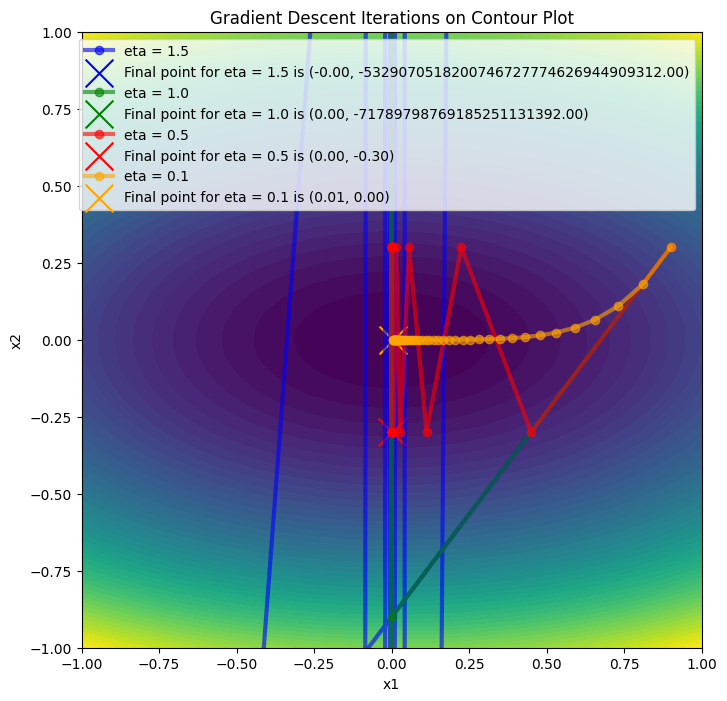

In [17]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function J(x) and its gradient
def J(x, epsilon):
	return 0.5 * (x[0]**2 + epsilon * x[1]**2)

def grad_J(x, epsilon):
	return np.array([x[0], epsilon * x[1]])

# Gradient Descent algorithm
def gradient_descent(x0, epsilon, eta, num_iterations):
	x = np.zeros((num_iterations, 2))
	x[0] = x0
	for k in range(1, num_iterations):
		x[k] = x[k-1] - eta * grad_J(x[k-1], epsilon)
	return x

# Parameters
epsilon = 4
eta_values = [0.1, 0.5, 1.0, 1.5]
colors = ['blue', 'green', 'red', 'orange']
eta_values.reverse()
x0 = np.array([0.9, 0.3])
num_iterations = 50

# Plotting the contour of the function J(x)
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = J([X1, X2], epsilon)

plt.figure(figsize=(8, 8))
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Iterations on Contour Plot')

# Run GD for different step sizes and plot the iterations
for i, eta in enumerate(eta_values):
	x = gradient_descent(x0, epsilon, eta, num_iterations)
	plt.plot(x[:, 0], x[:, 1], marker='o', label=f'eta = {eta}', alpha=0.6, linewidth=3, color=colors[i])
	plt.scatter(x[-1, 0], x[-1, 1], marker='x', s=400, color=colors[i], label=f'Final point for eta = {eta} is ({x[-1, 0]:.2f}, {x[-1, 1]:.2f})')


plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.legend()
plt.show()

5. **(2 points)** Consider the exact line search method for the dynamic choice of the step size. In this method, at each time step we choose:

$$
\tau_k = \arg \min_s J(x^{(k)} - s \nabla J(x^{(k)})).
$$

Compute the explicit expression of $ \tau_k $ given by the exact line search method for the function above.

#### Answer:

To compute the explicit expression of $ \tau_k $ given by the exact line search method for the function $ J(x) = \frac{1}{2} \left( x_0^2 + \epsilon x_1^2 \right) $, we need to minimize $ J(x^{(k)} - s \nabla J(x^{(k)})) $ with respect to $ s $.

Given:
$$ J(x) = \frac{1}{2} \left( x_0^2 + \epsilon x_1^2 \right) $$
The gradient of $ J $ is:
$$ \nabla J(x) = \begin{bmatrix} x_0 \\ \epsilon x_1 \end{bmatrix} $$

At iteration $ k $, the current point is $ x^{(k)} = \begin{bmatrix} x_0^{(k)} \\ x_1^{(k)} \end{bmatrix} $ and the gradient at this point is $ \nabla J(x^{(k)}) = \begin{bmatrix} x_0^{(k)} \\ \epsilon x_1^{(k)} \end{bmatrix} $.

We need to minimize:
$$ J(x^{(k)} - s \nabla J(x^{(k)})) = \frac{1}{2} \left( (x_0^{(k)} - s x_0^{(k)})^2 + \epsilon (x_1^{(k)} - s \epsilon x_1^{(k)})^2 \right) $$

Simplifying the expression inside $ J $:
$$ J(x^{(k)} - s \nabla J(x^{(k)})) = \frac{1}{2} \left( (1 - s)^2 (x_0^{(k)})^2 + \epsilon (1 - s \epsilon)^2 (x_1^{(k)})^2 \right) $$

To find the optimal $ s $, we take the derivative of the above expression with respect to $ s $ and set it to zero:
$$ \frac{d}{ds} \left[ \frac{1}{2} \left( (1 - s)^2 (x_0^{(k)})^2 + \epsilon (1 - s \epsilon)^2 (x_1^{(k)})^2 \right) \right] = 0 $$

$$ (1 - s) (x_0^{(k)})^2 + \epsilon (1 - s \epsilon) (-\epsilon x_1^{(k)})^2 = 0 $$

$$ (1 - s) (x_0^{(k)})^2 + \epsilon^2 (1 - s \epsilon) (x_1^{(k)})^2 = 0 $$

$$ (1 - s) (x_0^{(k)})^2 + \epsilon^2 (x_1^{(k)})^2 - \epsilon^3 s (x_1^{(k)})^2 = 0 $$

$$ (x_0^{(k)})^2 + \epsilon^2 (x_1^{(k)})^2 - s \left( (x_0^{(k)})^2 + \epsilon^3 (x_1^{(k)})^2 \right) = 0 $$

$$ s \left( (x_0^{(k)})^2 + \epsilon^3 (x_1^{(k)})^2 \right) = (x_0^{(k)})^2 + \epsilon^2 (x_1^{(k)})^2 $$

$$ s = \frac{(x_0^{(k)})^2 + \epsilon^2 (x_1^{(k)})^2}{(x_0^{(k)})^2 + \epsilon^3 (x_1^{(k)})^2} $$

Thus, the explicit expression for $ \tau_k $ is:
$$ \tau_k = \frac{(x_0^{(k)})^2 + \epsilon^2 (x_1^{(k)})^2}{(x_0^{(k)})^2 + \epsilon^3 (x_1^{(k)})^2} $$


We can also verify this result using sympy given the function $ J(x) = \frac{1}{2} \left( x_0^2 + \epsilon x_1^2 \right) $.

In [12]:
import sympy as sm

# Define the variables
s, epsilon = sm.symbols('s epsilon')
x0_k, x1_k = sm.symbols('x0_k x1_k')

# Define the function J(x) and its gradient
J = 0.5 * ((x0_k - s * x0_k)**2 + epsilon * (x1_k - s * epsilon * x1_k)**2)

# Take the derivative of J with respect to s
dJ_ds = sm.diff(J, s)

# Solve for s when the derivative is zero
s_optimal = sm.solve(dJ_ds, s)[0]

# Simplify the expression for s_optimal
s_optimal_simplified = sm.simplify(s_optimal)

# Display the result
s_optimal_simplified

(epsilon**2*x1_k**2 + x0_k**2)/(epsilon**3*x1_k**2 + x0_k**2)

6. **(3 points)** Implement the GD method with variable step size using the expression derived in the previous point and apply the method to the minimization of the function above. Display the iterations on the contour graphs. Comment on the results.

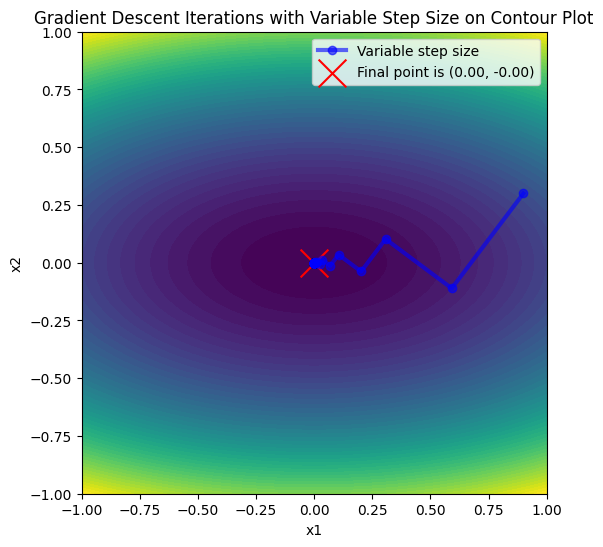

In [16]:
# Gradient Descent algorithm with variable step size
def gradient_descent_variable_step(x0, epsilon, num_iterations):
	x = np.zeros((num_iterations, 2))
	x[0] = x0
	for k in range(1, num_iterations):
		grad = grad_J(x[k-1], epsilon)
		tau_k = (x[k-1, 0]**2 + epsilon**2 * x[k-1, 1]**2) / (x[k-1, 0]**2 + epsilon**3 * x[k-1, 1]**2)
		x[k] = x[k-1] - tau_k * grad
	return x

def J(x, epsilon):
	return 0.5 * (x[0]**2 + epsilon * x[1]**2)

# Parameters
epsilon = 4
x0 = np.array([0.9, 0.3])
num_iterations = 50

# Run GD with variable step size
x_var_step = gradient_descent_variable_step(x0, epsilon, num_iterations)

# Plotting the contour of the function J(x)
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = J([X1, X2], epsilon)

plt.figure(figsize=(6, 6))
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Iterations with Variable Step Size on Contour Plot')

# Plot the iterations
plt.plot(x_var_step[:, 0], x_var_step[:, 1], marker='o', label='Variable step size', alpha=0.6, linewidth=3, color='blue')
plt.scatter(x_var_step[-1, 0], x_var_step[-1, 1], marker='x', s=400, color='red', label=f'Final point is ({x_var_step[-1, 0]:.2f}, {x_var_step[-1, 1]:.2f})')

plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.legend()
plt.show()

7. **(3 points)** Prove the expression for $ \tau_k $ given above.

To prove this, we analyze the gradient descent method with a step size $\tau_k$ for a convex and twice continuously differentiable function $J(x)$. Let $HJ(x)$ denote the Hessian matrix of $J(x)$, and $\| HJ(x) \|$ represent its spectral norm (maximum eigenvalue, since $HJ(x)$ is positive semi-definite for a convex function).

### 1. Gradient Descent Update Rule:
The gradient descent update at iteration $k$ is:
$$
x_{k+1} = x_k - \tau_k \nabla J(x_k).
$$

### 2. Convergence Criteria:
For convergence, the step size $\tau_k$ must ensure that the iterative process decreases $J(x)$ in every step. The decrease in $J(x)$ can be analyzed using the Taylor expansion of $J(x)$ around $x_k$:
$$
J(x_{k+1}) \approx J(x_k) + \nabla J(x_k)^T (x_{k+1} - x_k) + \frac{1}{2} (x_{k+1} - x_k)^T HJ(\xi) (x_{k+1} - x_k),
$$
where $\xi$ is some point on the line segment between $x_k$ and $x_{k+1}$.

Substitute $x_{k+1} = x_k - \tau_k \nabla J(x_k)$:
$$
x_{k+1} - x_k = -\tau_k \nabla J(x_k).
$$
The expansion becomes:
$$
J(x_{k+1}) \approx J(x_k) - \tau_k \|\nabla J(x_k)\|^2 + \frac{\tau_k^2}{2} \nabla J(x_k)^T HJ(\xi) \nabla J(x_k).
$$

### 3. Ensuring Decrease in $J(x)$:
To ensure $J(x_{k+1}) < J(x_k)$, the term involving $\tau_k^2$ must not outweigh the term involving $\tau_k$. Specifically:
$$
-\tau_k \|\nabla J(x_k)\|^2 + \frac{\tau_k^2}{2} \nabla J(x_k)^T HJ(\xi) \nabla J(x_k) < 0.
$$

Divide by $\|\nabla J(x_k)\|^2 > 0$ (assuming $\nabla J(x_k) \neq 0$):
$$
-\tau_k + \frac{\tau_k^2}{2} \lambda_{\max}(HJ(\xi)) < 0,
$$
where $\lambda_{\max}(HJ(\xi)) \leq \sup_x \|HJ(x)\|$. For this inequality to hold, $\tau_k$ must satisfy:
$$
0 < \tau_k < \frac{2}{\sup_x \|HJ(x)\|}.
$$

### 4. Conclusion:
The condition $0 < \tau_k < \frac{2}{\sup_x \|HJ(x)\|}$ ensures that each iteration decreases $J(x)$, leading to convergence. This upper bound arises from ensuring that the second-order term in the Taylor expansion does not dominate the decrease provided by the first-order term.
This would mean that the step size $\tau_k$ if not bounded properly could lead to jumping to the other side of the parabola in a point that is further from the minima than the initial point. This behaviour will lead to the divergence of the algorithm.

### 5. Note:

In the plot of point 3 we can actually see the partucular behaviour when $\tau$ is exactly equal to the upper bound. The algorithm is not converging but it is not diverging either. It is just oscillating around the minimum.



---

## Exercise 3 (6 points)

Consider the expression:

$$
y = f(x_1, x_2, x_3, x_4) = (x_1 + x_2) \cdot x_3 - x_4
$$

1. **(1 point)** Draw the computational graph and write the Wengert list corresponding to the equation above. How many intermediate variables do you need?
2. **(1 point)** Compute the values of the derivatives on the edges; report these values on the computational graph.
3. **(1 point)** Assume $x_1 = 1$, $x_2 = -2$, $x_3 = -1$, and $x_4 = 5$. Write the Wengert list for these input values.
4. **(1 point)** By using the derivatives on the edges, compute the values of $\frac{\partial y}{\partial x_i}$ for $i = 1, 2, 3, 4$. For the same cases, write the Wengert list for the derivatives.
5. **(2 points)** Write the reverse list and use it to compute $\frac{\partial y}{\partial x_i}$ for $i = 1, 2, 3, 4$.


#### Solution:

<div style="text-align: center">
	<img src="3.png" width="80%">
</div>